In [37]:
import numpy as nm
import math
import matplotlib.pyplot as plt
import networkx as nx
from qiskit import *

n=6
pi = math.pi
q=QuantumRegister(n)
c=ClassicalRegister(n)
qc=QuantumCircuit(q,c)

a,y=3.4691431646686093*2,3.4691431646686093*2

for i in range(n):
    qc.h(i)

qc.cx(0,2)
qc.rz(a,2)
qc.cx(0,2)

qc.cx(0,4)
qc.rz(a,4)
qc.cx(0,4)

qc.cx(0,5)
qc.rz(a,5)
qc.cx(0,5)

qc.cx(1,4)
qc.rz(a,4)
qc.cx(1,4)

qc.cx(1,5)
qc.rz(a,5)
qc.cx(1,5)

qc.cx(2,3)
qc.rz(a,3)
qc.cx(2,3)

qc.cx(2,4)
qc.rz(a,4)
qc.cx(2,4)

qc.barrier()

qc.cx(4,5)
qc.rz(a,5)
qc.cx(4,5)

qc.barrier()

for i in range(n):
    qc.rx(y,i)

qc.barrier()

for i in range(n):
  qc.measure(q[i],c[i])

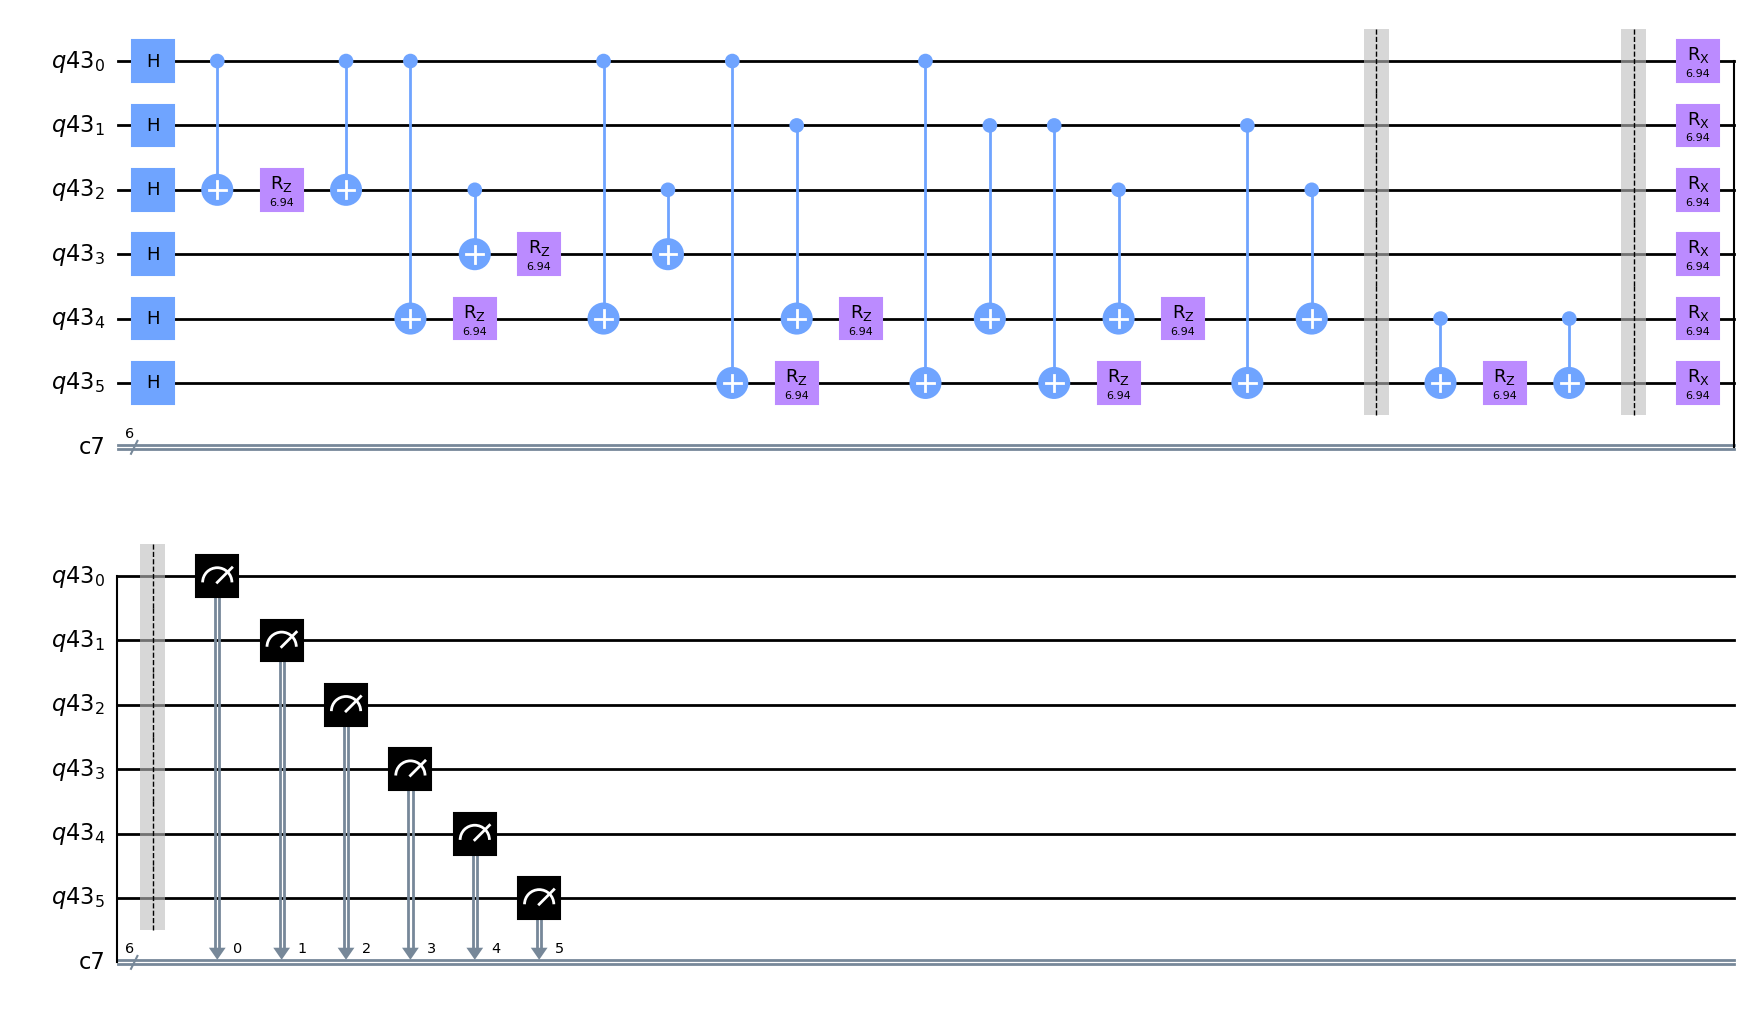

In [38]:
qc.draw(output="mpl")

In [39]:
sim = Aer.get_backend('aer_simulator')

res=execute(qc, backend=sim).result() 

In [40]:
res.get_counts()

{'111101': 31,
 '100011': 10,
 '001100': 57,
 '001010': 15,
 '100001': 32,
 '111111': 120,
 '110111': 66,
 '000000': 116,
 '001000': 71,
 '000100': 3,
 '101101': 14,
 '110011': 67,
 '001101': 42,
 '100010': 30,
 '111110': 15,
 '111011': 11,
 '100101': 5,
 '001110': 8,
 '000111': 2,
 '110000': 3,
 '011100': 14,
 '101011': 4,
 '000010': 28,
 '110101': 11,
 '011110': 17,
 '111010': 13,
 '001111': 2,
 '010001': 8,
 '011101': 32,
 '101111': 4,
 '110001': 9,
 '100000': 6,
 '101110': 6,
 '110010': 35,
 '000101': 9,
 '101010': 11,
 '000001': 23,
 '010101': 19,
 '010010': 13,
 '011000': 3,
 '011010': 1,
 '011111': 14,
 '100111': 2,
 '101000': 2,
 '010110': 7,
 '101001': 2,
 '010100': 3,
 '010111': 2,
 '111000': 2,
 '000011': 1,
 '010000': 3}

In [41]:
len(res.get_counts())

51

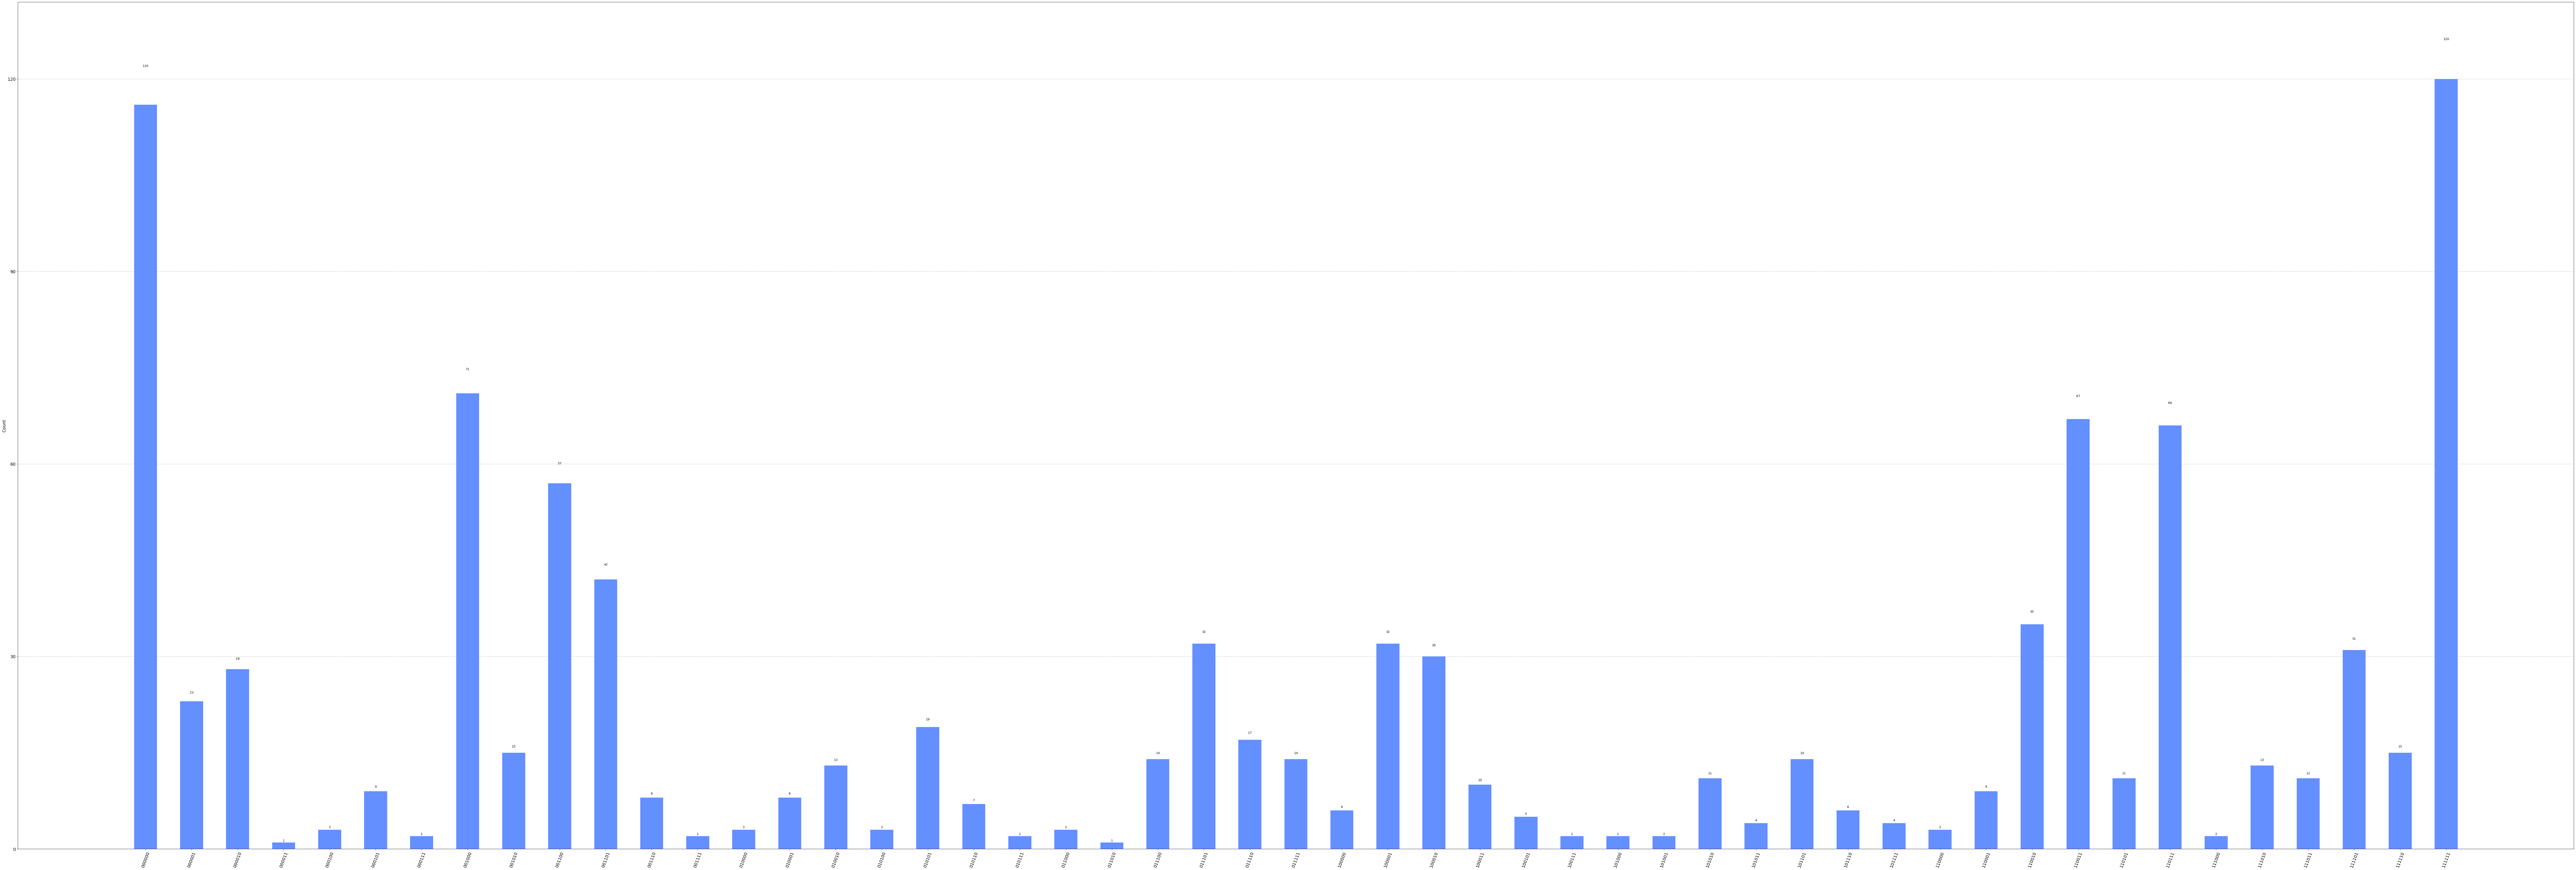

In [42]:
from qiskit.visualization import plot_histogram as ph
ph(res.get_counts(qc),figsize=(150,50))